# Final Project

**Due date: 06-December-2024**

For your final project you will develop a data narrative with a dataset of your choosing. Your data can come from any source. You do not have to comprehensively explore your data. Pick an interesting aspect or two from which to build your narrative.

## Requirements

- At least **three** visualizations. Visualizations can be simple bar charts that total data categories or rich exploratory figures. (*Tables also count as visualizations but you must have at least two charts.*) 
- All of the code should be recorded in your narrative. That is, I should be able to run your notebook code start to finish re-producing each of your outputs without error.
- At least **two** but no more than **three** paragraphs walking the reader through your analysis.
- Charts should exhibit your command of `ggplot2/dplyr/forcats/tidyr` with: 
  - sensibly sorted categories, 
  - interpretable labels/axis titles, 
  - useful annotations (when applicable), 
  - adjustments to default chart aesthetics, 
  - appropriate markings (e.g. `geoms`) and encodings.

## Notes

*This project should not take you longer than the time to complete two of our assignments. It is meant to demonstrate that you can build an analysis using `R` and the `Tidyverse` from scratch. Focus your analysis on a small number of data features that you find interesting.*

*Remember all the ways of visualizing distributions (ECDFs, histograms, jitter-ed scatter plots, etc.). These will come in very handy!* 

In the following visualizations, I explore tidytuesday's Trash Wheel Collection Data from Mr. Trash Wheel Baltimore Healthy Harbor Initiative. This data is about semi-autonomous trash interceptors that are placed at the end of a river and collect trash that would otherwise go into the ocean. The dataset has information on The dataset has information on four trash collectors from 2014 - 2023, including volume, weight, and number of different types of trash that was collected which are manually counted by workers at different intervals and then an estimated average is calculated.

In the first visualization, I wanted to see which of the four trash collectors stopped the highest volume of trash over the course of the seven years. I did this by grouping the data by trash collecter and finding the sum of the volume of trash collected and then plotting this as a column graph using geom_col. I wanted the resulting figure to be sorted by highest to lowest volume of trash stopped, I did this using the fct_reorder function. You can see in the resulting visualization that Mister Trash Wheel stops the most trash. For my next visualization, I was interested in how the volume of trash stopped changed over the years. I did a similar process of grouping the data by year and finding the sum of the volume of trash collected in each year. I then plotted this as a line graph. The resulting visualizaiton shows that 2018, 2022, and 2023 had the highest volume of trash stopped.

Finally, I wanted to see whether the different trash collectors stopped different types of trash. To view this, I used the pivot_longer function to change the structure of my data and make the type of trash stopped as a row value rather than a column name. I then grouped by data by trash collector, type of trash, and year. Finally, I used the facet_wrap function to graph four line graphs for each trash collector, stratified by type of trash collected. In the resulting graphs, you can see that not all trash collectors have data for each year, a finding that might impact our interpretation of the first visualization. You can also see that cigarette butts are the most common trash item collected across all four trash collectors. However, there are differences in the other types of trash collected. For instance, Gwynda has been collecting an increasing number of wrappers from 2022 to 2023, but Captain does not report any wrappers counted.

In [1]:
library('tidyverse')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
url = 'https://raw.githubusercontent.com/rfordatascience/tidytuesday/refs/heads/main/data/2024/2024-03-05/trashwheel.csv'

trashwheel = read_csv(url)

Rows: 993 Columns: 16
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): ID, Name, Month, Date
dbl (12): Dumpster, Year, Weight, Volume, PlasticBottles, Polystyrene, Cigar...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
trashwheel |> head()

ID,Name,Dumpster,Month,Year,Date,Weight,Volume,PlasticBottles,Polystyrene,CigaretteButts,GlassBottles,PlasticBags,Wrappers,SportsBalls,HomesPowered
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mister,Mister Trash Wheel,1,May,2014,5/16/2014,4.31,18,1450,1820,126000,72,584,1162,7,0
mister,Mister Trash Wheel,2,May,2014,5/16/2014,2.74,13,1120,1030,91000,42,496,874,5,0
mister,Mister Trash Wheel,3,May,2014,5/16/2014,3.45,15,2450,3100,105000,50,1080,2032,6,0
mister,Mister Trash Wheel,4,May,2014,5/17/2014,3.10,15,2380,2730,100000,52,896,1971,6,0
mister,Mister Trash Wheel,5,May,2014,5/17/2014,4.06,18,980,870,120000,72,368,753,7,0
mister,Mister Trash Wheel,6,May,2014,5/20/2014,2.71,13,1430,2140,90000,46,672,1144,5,0


In [28]:
trashwheel_name = trashwheel |>
    filter(!is.na(Volume)) |>
    group_by(Name) |>
    summarize(sum_volume = sum(Volume))

trashwheel_name |> head()

Name,sum_volume
<chr>,<dbl>
Captain Trash Wheel,291
Gwynnda Trash Wheel,3279
Mister Trash Wheel,9589
Professor Trash Wheel,1656


In [50]:
year = trashwheel |>
    filter(!is.na(Volume)) |>
    group_by(Year) |>
    summarize(sum_volume = sum(Volume))

year |> glimpse()

Rows: 10
Columns: 2
$ Year       <dbl> 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023
$ sum_volume <dbl> 669, 1103, 816, 1151, 1828, 1254, 1328, 1890, 2361, 2415


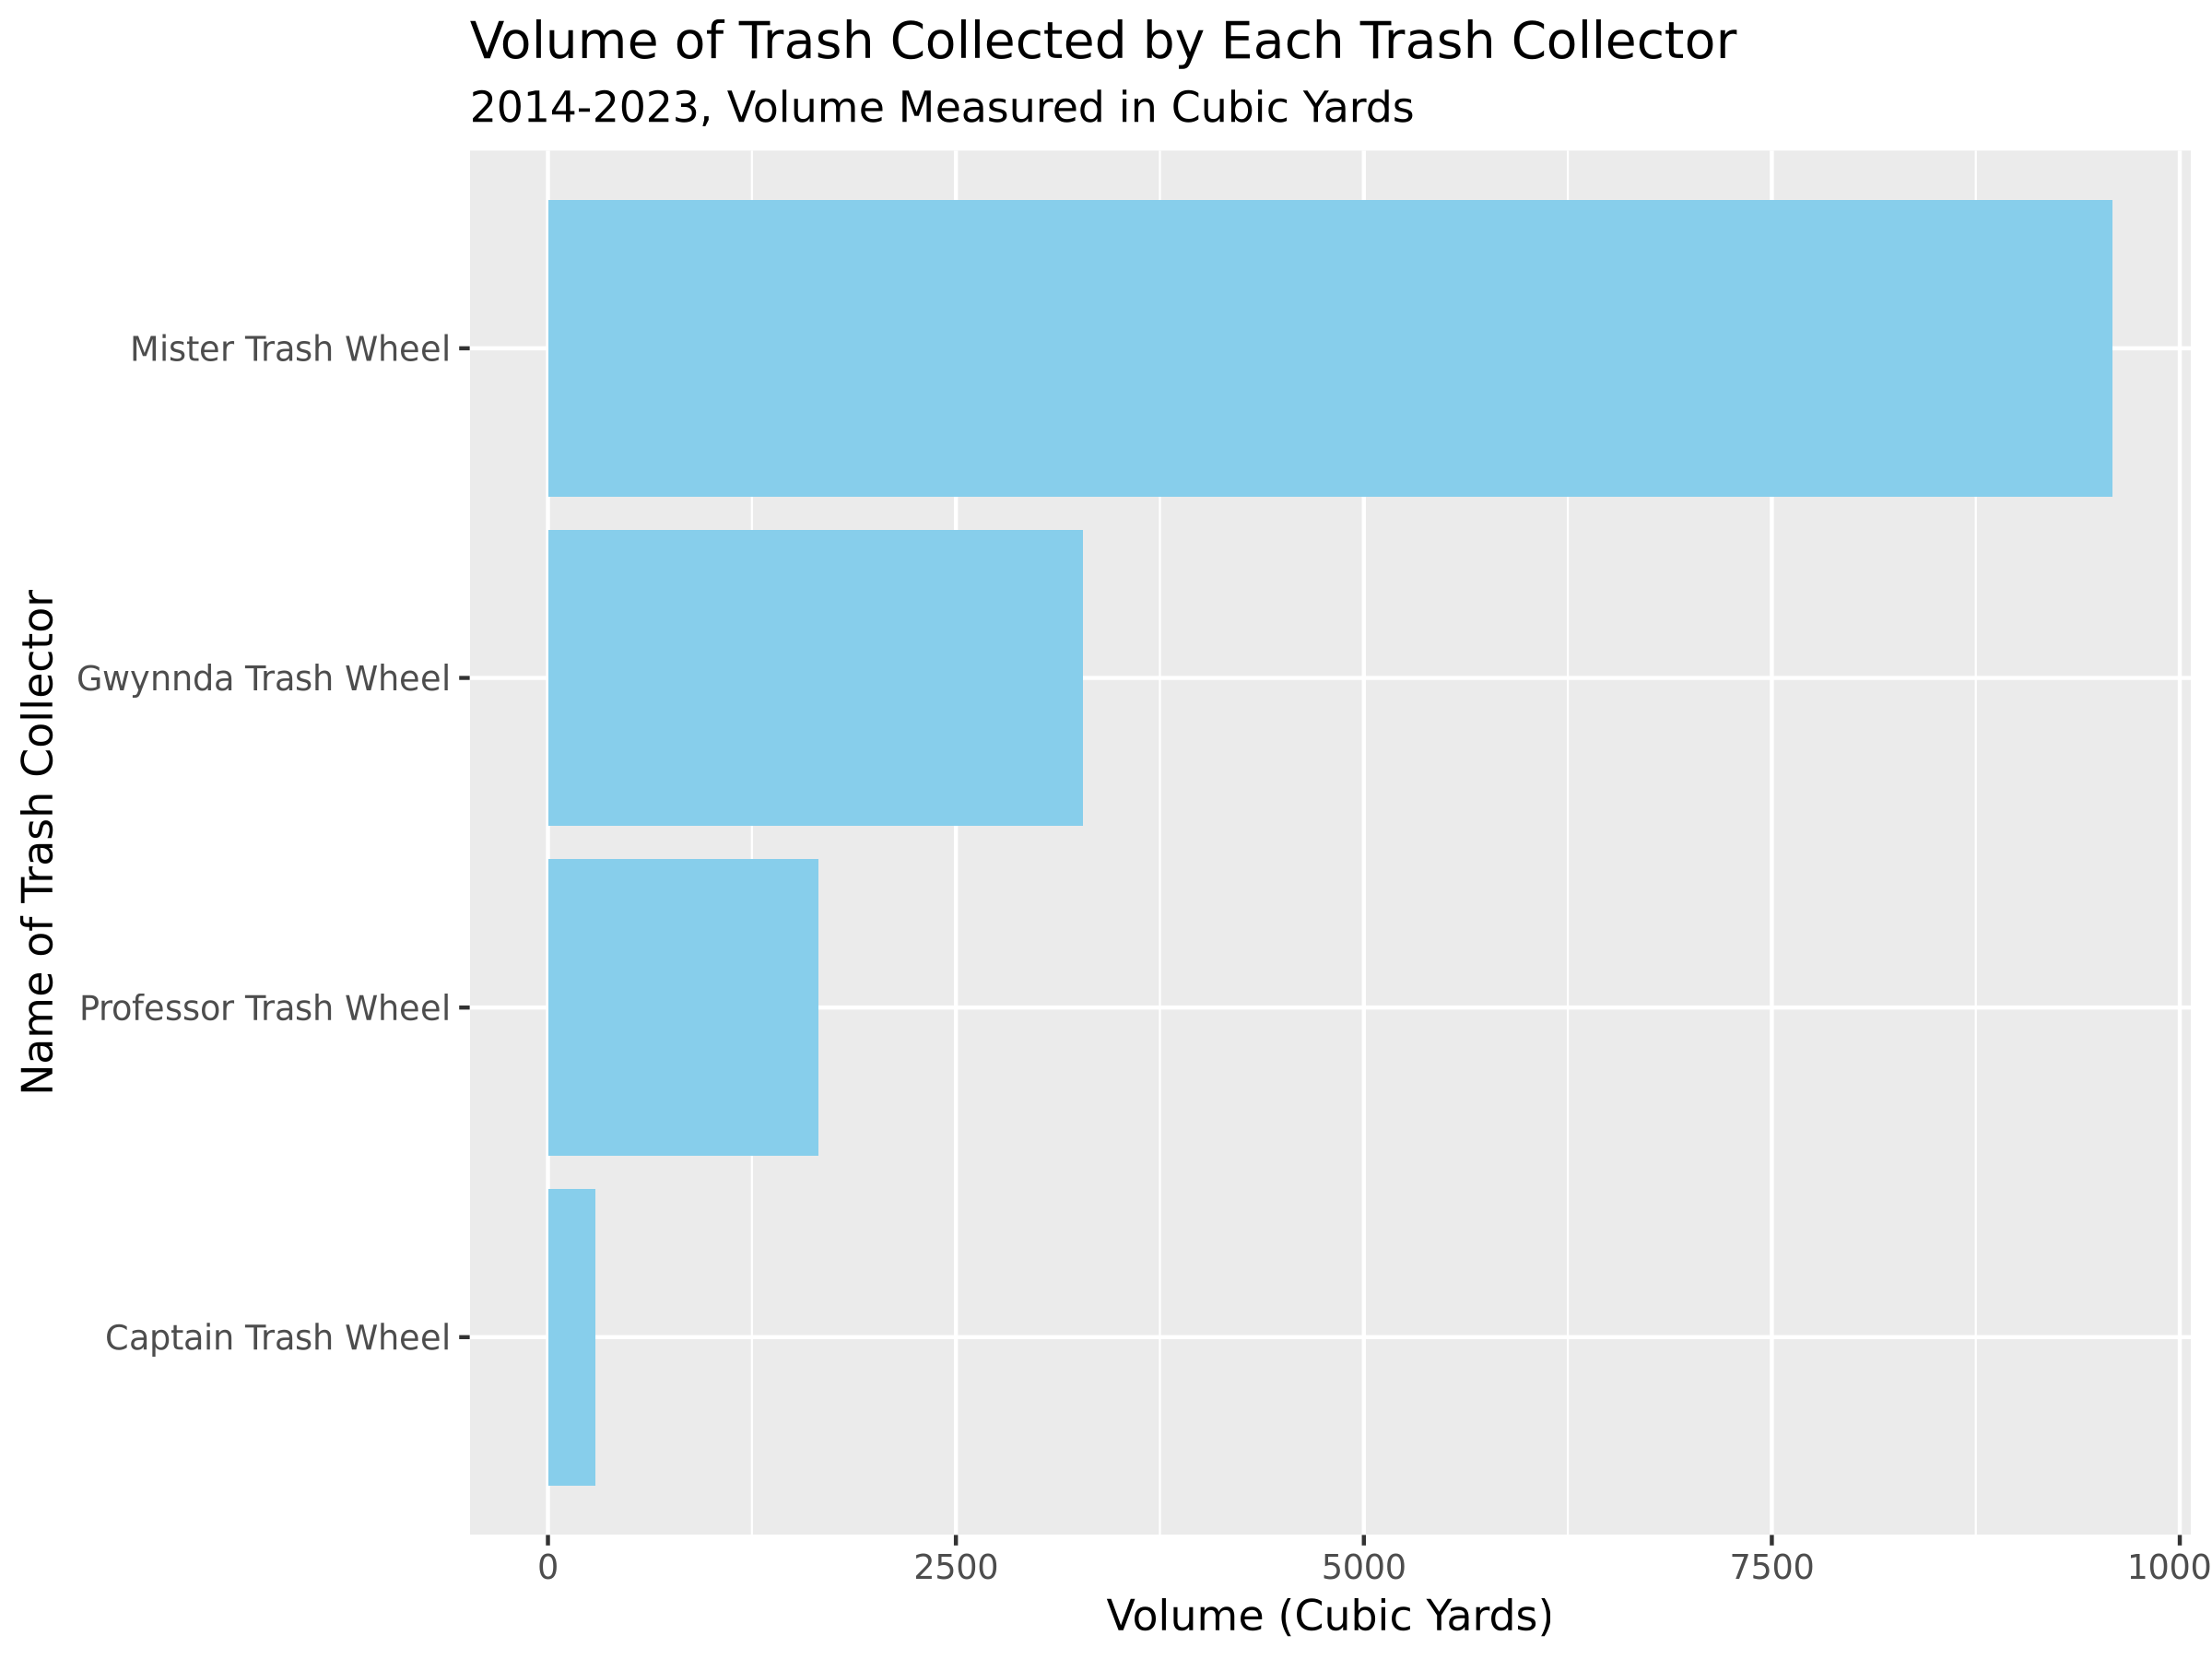

In [89]:
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 6)

trashwheel_name |>
    mutate(Name = fct_reorder(Name, sum_volume)) |>
    ggplot(aes(y = Name, x = sum_volume)) + 
        geom_col(fill = 'skyblue') + 
        labs(
            title = "Volume of Trash Collected by Each Trash Collector",
            subtitle = "2014-2023, Volume Measured in Cubic Yards",
            y = 'Name of Trash Collector',
            x = 'Volume (Cubic Yards)')

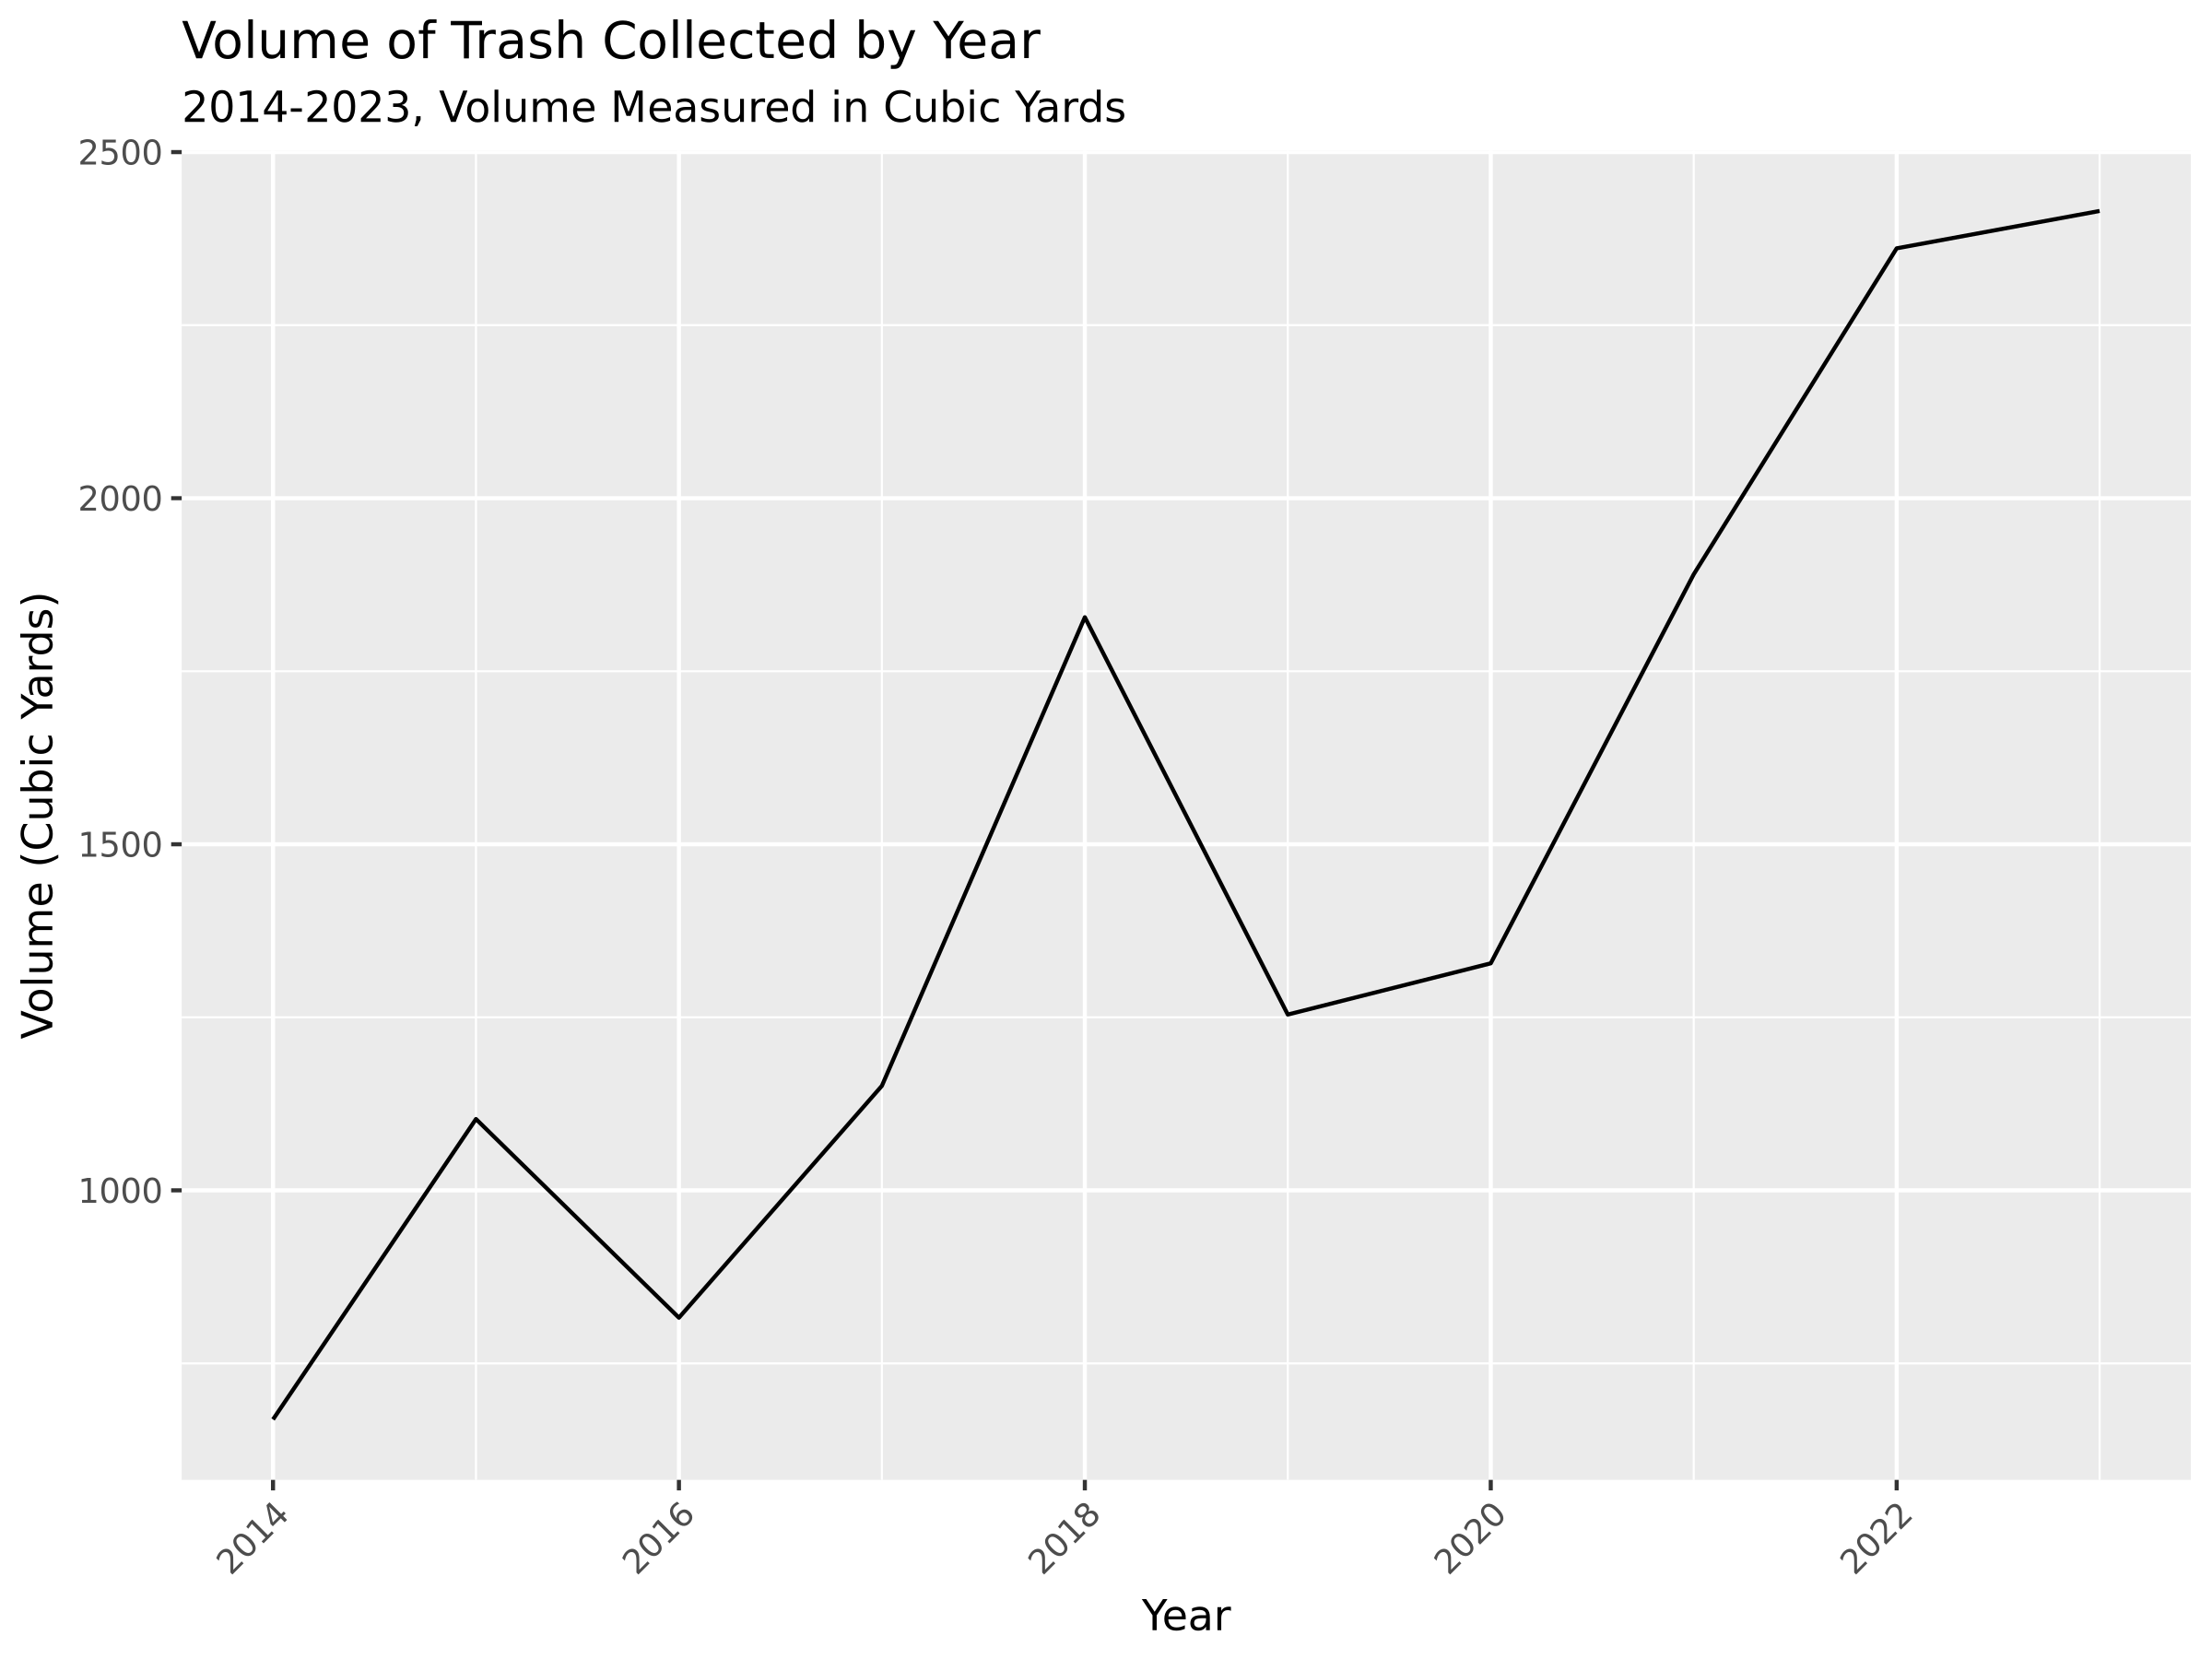

In [90]:
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 6)

ggplot(year, aes(x = Year, y = sum_volume)) + 
    geom_line() +
    labs(
            title = "Volume of Trash Collected by Year",
            subtitle = "2014-2023, Volume Measured in Cubic Yards",
            y = 'Volume (Cubic Yards)',
            x = 'Year') + 
    theme(axis.text.x = element_text(angle = 45, hjust = 1))

In [92]:
trashbytype = trashwheel |>
    pivot_longer(cols = c(PlasticBottles, Polystyrene, CigaretteButts, GlassBottles, PlasticBags, Wrappers, SportsBalls), names_to = 'Type', values_to = 'Number') |>
    filter(!is.na(Number)) |>
    group_by(Name, Type, Year) |>
    summarize(sum_number = sum(Number))

trashbytype |> glimpse()

`summarise()` has grouped output by 'Name', 'Type'. You can override using the
`.groups` argument.


Rows: 151
Columns: 4
Groups: Name, Type [23]
$ Name       <chr> "Captain Trash Wheel", "Captain Trash Wheel", "Captain Tras…
$ Type       <chr> "CigaretteButts", "CigaretteButts", "CigaretteButts", "Ciga…
$ Year       <dbl> 2018, 2019, 2020, 2021, 2022, 2023, 2018, 2019, 2020, 2021,…
$ sum_number <dbl> 40200, 15600, 18800, 18700, 9900, 13200, 9600, 10400, 9190,…


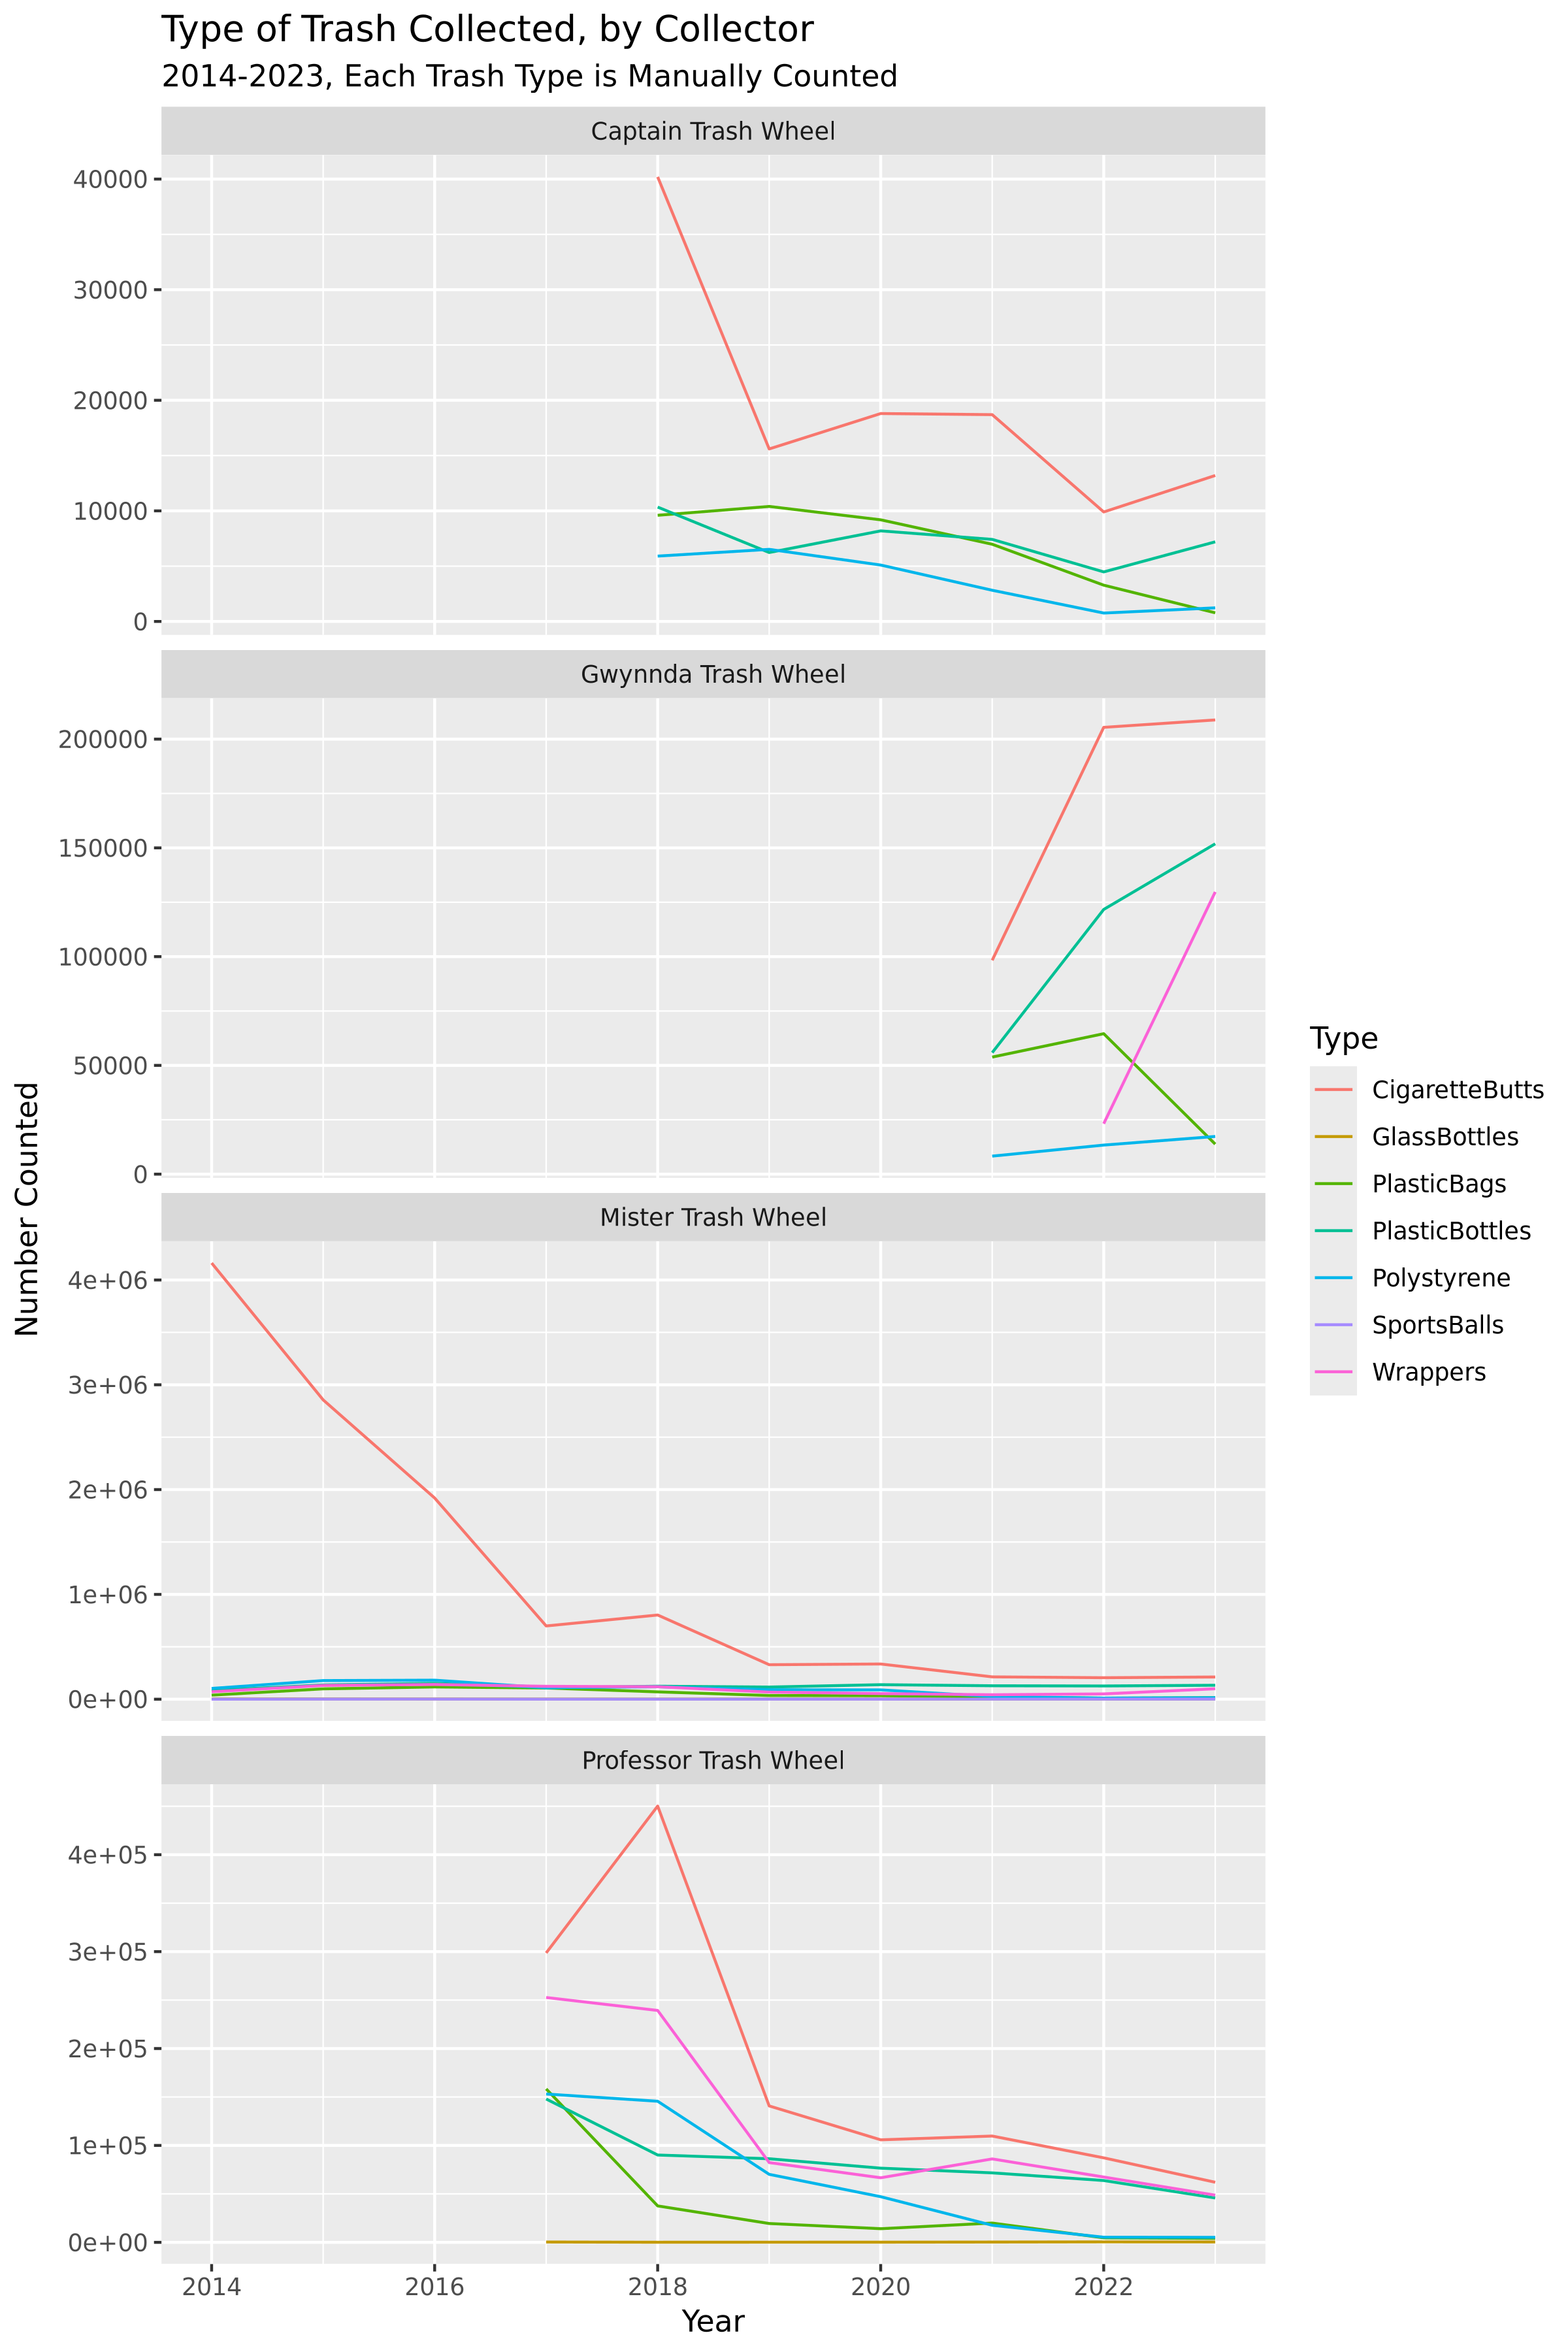

In [97]:
options(repr.plot.res = 300, repr.plot.width = 8, repr.plot.height = 12)

ggplot(trashbytype, aes(x = Year, y = sum_number, color = Type)) + 
        geom_line(na.rm = TRUE) +
        facet_wrap(~Name, ncol = 1, scales = 'free_y') +
        labs(
            title = "Type of Trash Collected, by Collector",
            subtitle = "2014-2023, Each Trash Type is Manually Counted",
            y = 'Number Counted',
            x = 'Year') 